## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo(E).
> Simulación de los momios de apuestas de la Premier League en las últimas 5 temporadas.
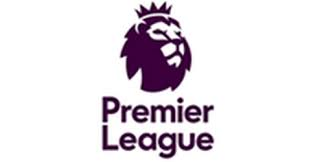

### 1.2 Objetivos(E).

> #### 1.1 Objetivo general.
>  - Conseguir un momio adecuado para campeón de la temporada.
>  - Simular los momios de resultados finales de todos los partidos.
> #### 1.2 Objetivos específicos
>  - Definir nodos y variables que se quieren simular.
>  - Obtener la base de datos que tenga esas variables.
>  - Escoger equipos a simular.
>  - Computar un modelo para cada uno de los equipos(Nodos) con un código óptimo y funcional.
>  - Mostrar resultados y enunciar la conclusión del proyecto.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


### 1.3 Definición del problema.(G)
> Después del 2008 el mundo se dio cuenta que los mercados financieros son muy volátiles y son controlados por capitales que en su mayoría se encuentran fuera del alcance de la mayoría de las personas. Después de este suceso se empezó a migrar a nuevas técnicas de hacer que el dinero crezca a base de una inversión. El mercado de las apuestas deportivas es un área de oportunidad que muy pocos ven por su nivel de riesgo, ya que tiene una particularidad, se gana muy bien pero también se puede perder todo el capital invertido en un abrir y cerrar de ojos. 

>En este proyecto trataremos de modelar situaciones deportivas como el campeonato inglés el cual está catalogado como el más competitivo y por ende más diversificado en los momios deportivos. En la mayoría de los casos las personas pierden su dinero porque apuestan por sentimiento sin analizar ningún dato. Este proyecto se basaría en datos históricos como los momios deportivos.

>Ya con los momios calcularíamos la probabilidad de que el equipo seleccionado gane el partido en base a él momio. Mediante el uso de una distribución, la cual decidiremos cual usar dependiendo de los datos, podremos simular el ganador de un partido, este proceso lo podríamos repetir con cualquier equipo y poder usarlo para otras apuestas. Y así poder diversificar el portafolio de apuestas. 


### 1.4 Nodos y variables que se decidieron simular y porqué(E)

> Los Nodos se asignaron a los equipos campeones o subcampeones en la Premier League las últimas 4 temporadas. 
> #### Nodo 1: Chelsea. 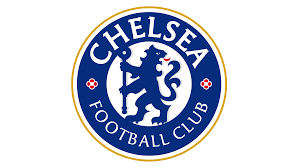
> - Se escogió el equipo Chelsea como Nodo, ya que fue el campeón en la temporada 2016-2017.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

> #### Nodo 2: Manchester United. 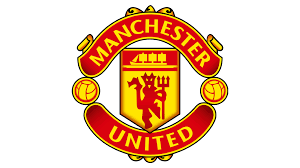
> - El equipo Manchester United se eligió como Nodo, ya que fue el subcampeón en la temporada 2017-2018.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

> #### Nodo 3: Manchester City. 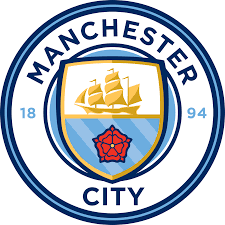
> - Manchester city ha sido el equipo que más veces ha aparecido en el pálmares ingles en los últimos años, por esa razón su aparición es importante en el proyecto.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

> #### Nodo 4: Liverpool. 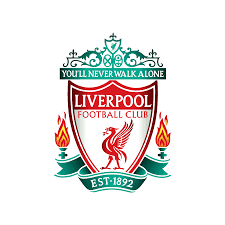
> - El equipo Liverpool se escogió ya que fue el campeón de la última temporada.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

### 1.5 Definición de hipótesis y supuestos.(G)
>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.

### 1.6 Obtención de bases de datos(E)
> Para realizar este proyecto se descargaron los datos de la página https://www.football-data.co.uk/englandm.php donde hay datos estadísticos recopilados desde el inicio de la liga hasta la actualidad.

> En el caso del proyecto esgimos descargar el conjunto de datos de las últimas 5 temporadas de la Premier League, donde se pueden encontrar los datos estadísticos de los partidos además de los momios de diferentes casas de apuestas para los partidos. Para realizar los cuatro nodos decidimos solo recurrimos a los datos de los 4 mejores equipos en base a los pálmares de la liga.


In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize

In [2]:

data2021=pd.read_csv('E0.csv')
data2021.set_index('Date',inplace=True)
data1920=pd.read_csv('E0 (4).csv')
data1920.set_index('Date',inplace=True)
data1819=pd.read_csv('E0 (3).csv')
data1819.set_index('Date',inplace=True)
data1718=pd.read_csv('E0 (2).csv')
data1718.set_index('Date',inplace=True)
data1617=pd.read_csv('E0 (1).csv')
data1617.set_index('Date',inplace=True)
data1 = data1617.append(data1718).append(data1819)
data2 = data1920.append(data2021)
data1

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,
13/08/16,E0,Burnley,Swansea,0,1,A,0,0,D,J Moss,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
13/08/16,E0,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
13/08/16,E0,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
13/08/16,E0,Hull,Leicester,2,1,H,1,0,H,M Dean,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
13/08/16,E0,Man City,Sunderland,2,1,H,1,0,H,R Madley,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/05/2019,E0,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
12/05/2019,E0,Man United,Cardiff,0,2,A,0,1,A,J Moss,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
12/05/2019,E0,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49


In [3]:
cheh = data1[data1['HomeTeam'] == 'Chelsea' ]
cheh1 = data2[data2['HomeTeam'] == 'Chelsea' ]
cheh = cheh.append(cheh1)
chea = data1[data1['AwayTeam'] == 'Chelsea' ]
chea1 = data2[data2['AwayTeam'] == 'Chelsea' ]
chea = chea.append(chea1)#primer nodo

Mch = data1[data1['HomeTeam'] == 'Manchester City' ]
Mch1 = data2[data2['HomeTeam'] == 'Manchester City' ]
Mch = Mch.append(Mch1)
Mca = data1[data1['AwayTeam'] == 'Manchester City' ]
Mca1 = data2[data2['AwayTeam'] == 'Manchester City' ]
Mca = Mca.append(Mca1)#segundo nodo

Muh = data1[data1['HomeTeam'] == 'Manchester United' ]
Muh1 = data2[data2['HomeTeam'] == 'Manchester United' ]
Muh = Muh.append(Muh1)
Mua = data1[data1['AwayTeam'] == 'Manchester United' ]
Mua1 = data2[data2['AwayTeam'] == 'Manchester United' ]#Tercer nodo
Mua = Mua.append(Mua1)

livh = data1[data1['HomeTeam'] == 'Liverpool' ]
livh1 = data2[data2['HomeTeam'] == 'Liverpool' ]
livh = livh.append(livh1)
liva = data1[data1['AwayTeam'] == 'Liverpool' ]
liva1 = data2[data2['AwayTeam'] == 'Liverpool' ]
liva = liva.append(liva1)#Cuarto nodo
data1

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,
13/08/16,E0,Burnley,Swansea,0,1,A,0,0,D,J Moss,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
13/08/16,E0,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
13/08/16,E0,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
13/08/16,E0,Hull,Leicester,2,1,H,1,0,H,M Dean,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
13/08/16,E0,Man City,Sunderland,2,1,H,1,0,H,R Madley,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/05/2019,E0,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
12/05/2019,E0,Man United,Cardiff,0,2,A,0,1,A,J Moss,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
12/05/2019,E0,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49


90

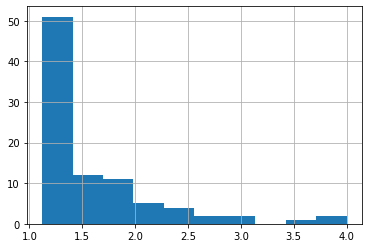

In [4]:
cheh['B365H'].hist()
len(cheh['B365H'])

Text(0, 0.5, 'Frecuencia')

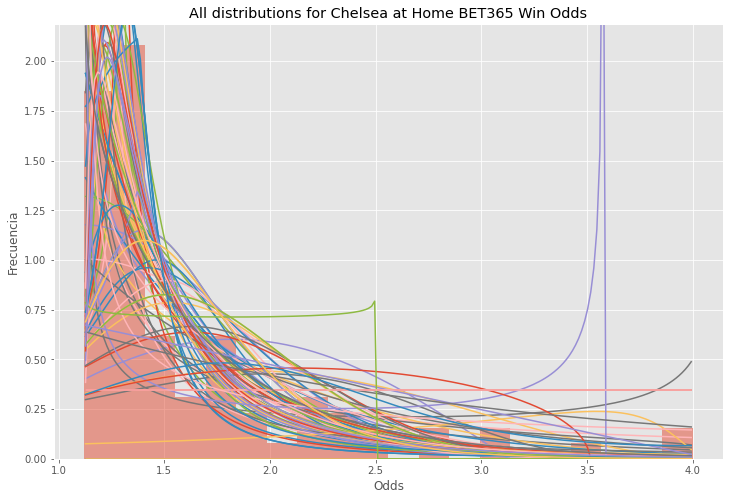

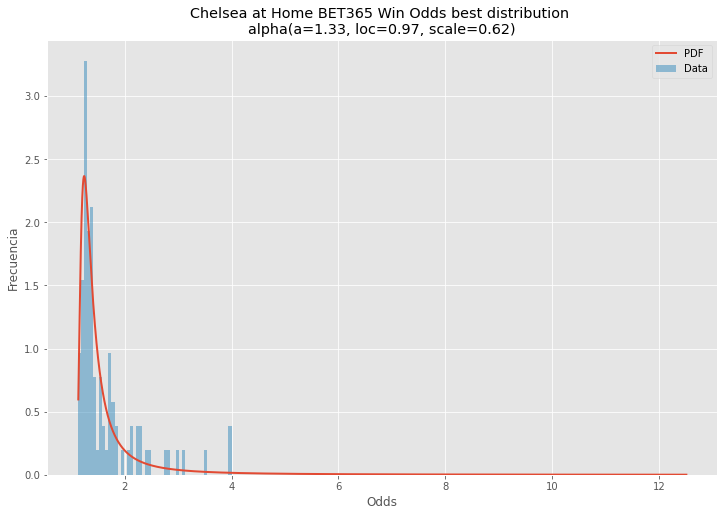

In [5]:
data = cheh['B365H']
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

#    DISTRIBUTIONS = [st.alpha, st.beta, st.chi,st.chi2, st.gamma, st.norm, st.logistic,st.loggamma,
#                    st.loglaplace,st.lognorm, st.t, st.triang]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Chelsea at Home BET365 Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Chelsea at Home BET365 Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

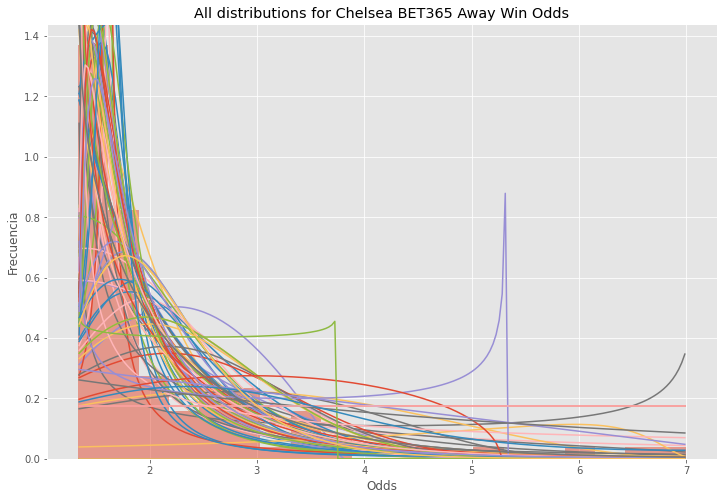

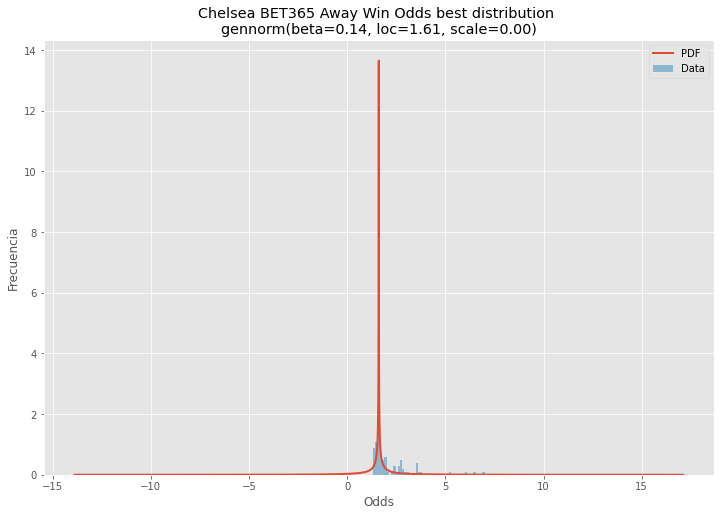

In [6]:
# Load data from statsmodels datasets
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')
data = chea['B365A']
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Chelsea BET365 Away Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Chelsea BET365 Away Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

In [10]:
Muh = data1[data1['HomeTeam'] == 'Man United' ]
Muh1 = data2[data2['HomeTeam'] == 'Man United' ]
Muh = Muh.append(Muh1)
Mua = data1[data1['AwayTeam'] == 'Man United' ]
Mua1 = data2[data2['AwayTeam'] == 'Man United' ]#Tercer nodo
Mua = Mua.append(Mua1)
Muh

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
Date,,,,,,,,,,,,,,,,,,,,,
19/08/16,E0,Man United,Southampton,2,0,H,1,0,H,A Taylor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/09/16,E0,Man United,Man City,1,2,A,1,2,A,M Clattenburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24/09/16,E0,Man United,Leicester,4,1,H,4,0,H,M Dean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02/10/16,E0,Man United,Stoke,1,1,D,0,0,D,R Madley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29/10/16,E0,Man United,Burnley,0,0,D,0,0,D,M Clattenburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/01/2021,E0,Man United,Aston Villa,2,1,H,1,0,H,M Oliver,...,2.45,-0.75,1.91,1.99,1.95,1.97,2.07,2.08,1.90,1.98
27/01/2021,E0,Man United,Sheffield United,1,2,A,0,1,A,P Bankes,...,2.44,-1.75,2.03,1.90,2.03,1.88,2.11,1.98,2.02,1.86
02/02/2021,E0,Man United,Southampton,9,0,H,4,0,H,M Dean,...,2.49,-1.25,2.01,1.92,2.00,1.93,2.03,2.01,1.96,1.92


Text(0, 0.5, 'Frecuencia')

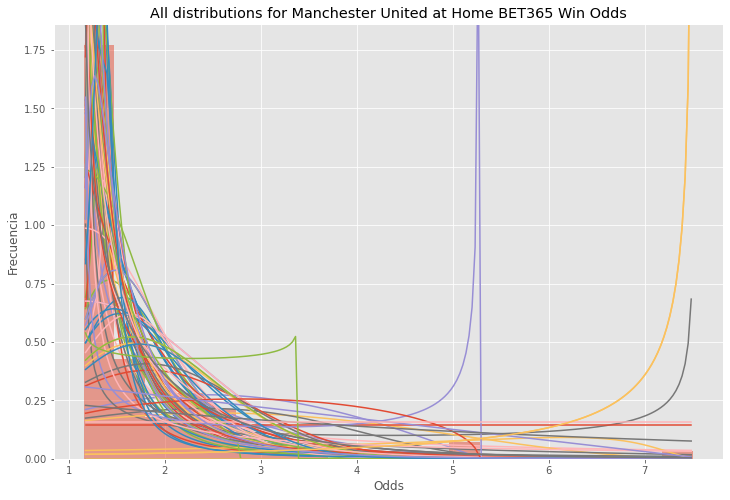

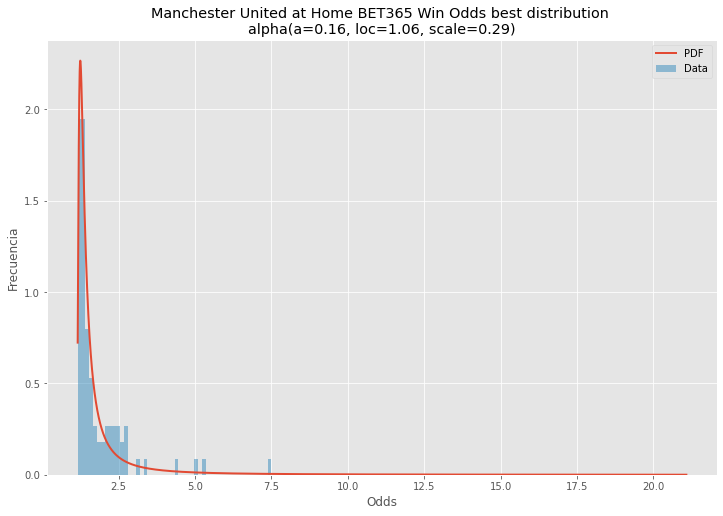

In [11]:
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')
# Load data from statsmodels datasets
data = Muh['B365H']
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Manchester United at Home BET365 Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Manchester United at Home BET365 Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

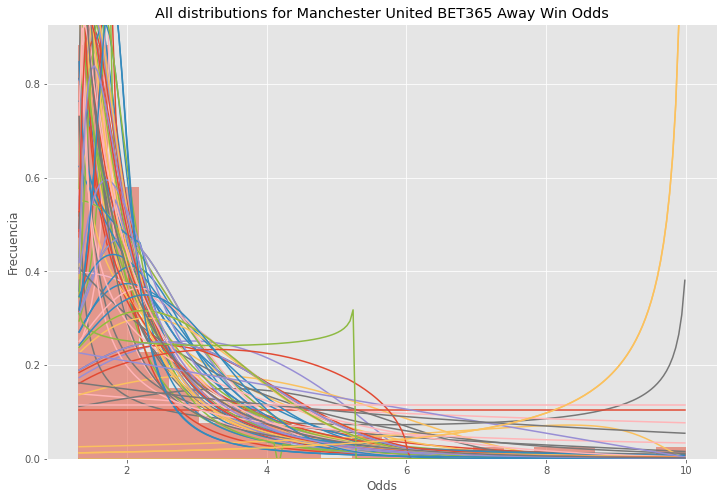

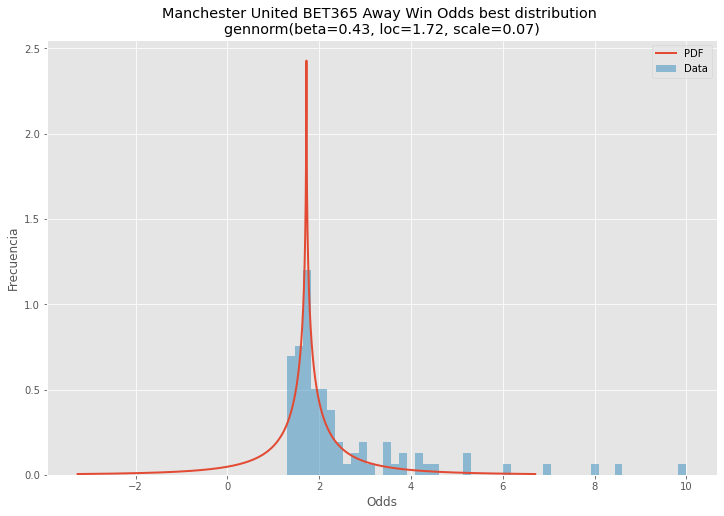

In [13]:
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')
# Load data from statsmodels datasets
data = Mua['B365A']
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Manchester United BET365 Away Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Manchester United BET365 Away Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')